In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1. Data Preparation**

---



In [2]:
# load data boston.csv
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The data is about predicting housing price (medv) in Boston city, features:
- Criminal rate (crim)
- Residential land zoned proportion (zn)
- Non-retail business acres proportion (indus)
- Is bounds with river (chas)
- Nitrogen oxides concentration (nox)
- Number rooms average (rm)
- Owner age proportion (age)
- Weighted distance to cities (dis)
- Accessibility index (rad)
- Tax rate (tax)
- Pupil-teacher ratio (ptratio)
- Black proportion (black)
- Percent lower status (lstat)

**2. Split data: train - validate - test**

---



In [3]:
# split train-validate-test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

**3. Plot the distribution of the target variable medv**

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


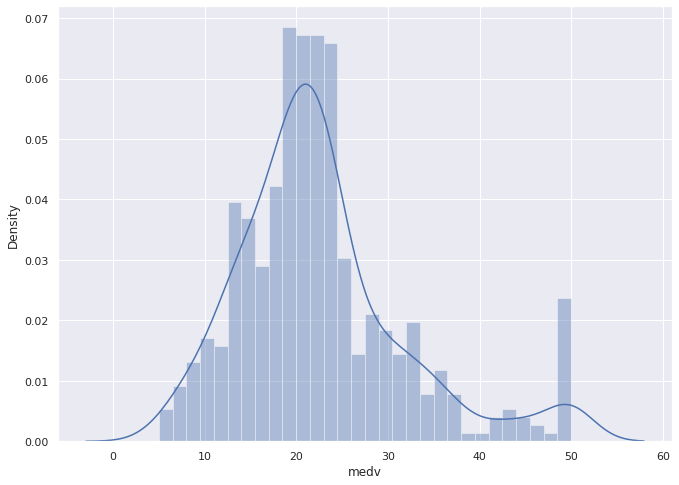

In [4]:
# plot the distribution of the target variable medv
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(boston['medv'], bins=30)
plt.show()

dapat dilihat pada gambar diatas bahwa medv terdistribusi normal namun masih memiliki sedikit outliers.

**4. Draw correlation plot on training data and perform feature selection on highly correlated features**

---



In [5]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


There are several features with high VIF (>= 3) scores:
1. indus
2. nox
3. age
4. dis
5. rad
6. tax
7. lstat

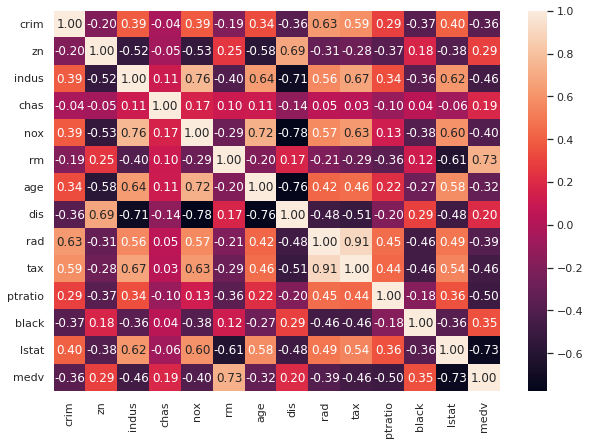

In [6]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

mm has the highest positive correlation with medv and lstat has the highest negative correlation with medv. Therefore, we need to drop: (Threshold >= 0.8)
1. rad
2. tax

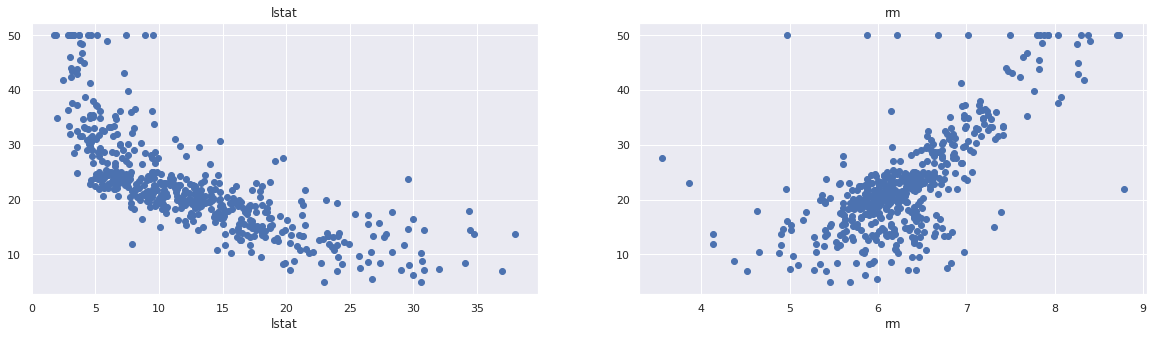

In [8]:
# mm and lstat are features (scatter plot to see how these features vary with medv)
plt.figure(figsize=(20,5))

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
  plt.subplot(1, len(features), i+1)
  x=boston[col]
  y=target
  plt.scatter(x, y, marker='o')
  plt.title(col)
  plt.xlabel(col)

- Harga rumah di boston meningkat karena nilai RM meningkat secara linier.
- Harga rumah di boston turun karena peningkatan nilai lstat.

In [9]:
# drop multicollinear features
feature_boston_train = feature_boston_train.drop(columns=['rad','tax'])
feature_boston_validation = feature_boston_validation.drop(columns=['rad','tax'])
feature_boston_test = feature_boston_test.drop(columns=['rad','tax'])

In [10]:
# re-check VIF
X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.404723
2,zn,2.253252
3,indus,3.214656
4,chas,1.097597
5,nox,4.118454
6,rm,1.908463
7,age,3.085304
8,dis,4.382486
9,ptratio,1.526414
10,black,1.323257


**4. Fit models on training data (lambdas = [0.01, 0.1, 1, 10])**

---



In [11]:
# Ridge Regression

from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

In [12]:
# Lasso Regression

from sklearn.linear_model import Lasso

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

**5. Choose the best lambda from the validation set**

---



Use RMSE as metric

In [13]:
# Ridge Regression
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.962234082671707
RMSE of Ridge regression model with alpha = 0.1 is 4.950661805765886
RMSE of Ridge regression model with alpha = 1.0 is 4.909045042614708
RMSE of Ridge regression model with alpha = 10 is 4.867167076950583


best lambda ridge regression adalah 10 karena memiliki nilai RMSE paling kecil

In [14]:
# Lasso Regression
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934493563284168
RMSE of Lasso regression model with alpha = 0.1 is 4.904075071284979
RMSE of Lasso regression model with alpha = 1.0 is 4.845769009470302
RMSE of Lasso regression model with alpha = 10 is 5.4366365235863565


best lambda ridge regression adalah 1.0 karena memiliki nilai RMSE paling kecil

Interpret a sample of the coefficients of the best model

In [15]:
# Ridge regression
model_ridge = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[model_ridge.intercept_] + list(model_ridge.coef_)
})

In [16]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,15.150035
1,crim,-0.081692
2,zn,0.030016
3,indus,-0.086739
4,chas,1.946433
5,nox,-1.668543
6,rm,4.759384
7,age,-0.010993
8,dis,-1.236508
9,ptratio,-0.731620


**Interpretation**

medv = 15.150 + (-0.081) crim + 0.030 zn + (-0.086) indus + 1.946 chas + (-1.668) nox + 4.759 rm + (-0.010) age + (-1.236) dis + (-0.731) ptratio + 0.013 black + (-0.528) lstat

penambahan 1 point rm (number rooms average) dengan menganggap fitur lainnya tetap akan meningkatkan harga rumah di kota Boston karena setiap penambahan 1 point rm akan menambah medv sebesar 4.759.


fitur yang paling mempengaruhi tingginya harga rumah di kota Boston adalah rm (number rooms average)

In [17]:
# Lasso regression
model = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

In [18]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,25.859306
1,crim,-0.056676
2,zn,0.020648
3,indus,-0.028455
4,chas,0.000000
5,nox,-0.000000
6,rm,2.465867
7,age,0.022761
8,dis,-0.557911
9,ptratio,-0.717385


**Interpretation**

medv = 25.859 + (-0.056) crim + 0.020 zn + (-0.028) indus + 0.000 chas + 0.000 nox + 2.465 rm + 0.022 age + (-0.557) dis + (-0.717) ptratio + 0.012 black + (-0.719) lstat

penambahan 1 point rm (number rooms average) dengan menganggap fitur lainnya tetap akan meningkatkan harga rumah di kota Boston karena setiap penambahan 1 point rm akan menambah medv sebesar 2.465.

fitur yang paling mempengaruhi tingginya harga rumah di kota Boston adalah rm (number rooms average)

**6. Evaluate the best models on the test data (+ interpretation)**

---



Training Error

In [19]:
# Ridge regression
y_predict_train = ridge_best.predict(X_boston_train)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_boston_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_boston_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_boston_train)))

RMSE for training data is 4.782228475318233
MAE for training data is 3.389406834761317
MAPE for training data is 0.20893180788325846


simpangan baku residual sebesar +- 4.782

secara rata-rata prediksi menyimpang dari actual medv sebanyak 3.389

3.38 equivalent dengan 20.89% deviasi relatif dari prediksi actual dari medv

In [21]:
# Lasso regression
y_predict_train = lasso_best.predict(X_boston_train)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_boston_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_boston_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_boston_train)))

RMSE for training data is 5.175294931416954
MAE for training data is 3.697337156294457
MAPE for training data is 0.23804956492884471


simpangan baku residual sebesar +- 5.175

secara rata-rata prediksi menyimpang dari actual medv sebanyak 3.697

3.697 equivalent dengan 23.80% deviasi relatif dari prediksi actual dari medv

Testing Error

In [23]:
# Ridge regression
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_boston_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_boston_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_boston_test)))

RMSE for testing data is 5.1603544653640565
MAE for testing data is 3.254717665955977
MAPE for testing data is 0.25922815354901996


simpangan baku residual sebesar +- 5.160

secara rata-rata prediksi menyimpang dari actual medv sebanyak 3.254

3.254 equivalent dengan 25.922% deviasi relatif prediksi actual dari medv

In [25]:
# Lasso regression
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_boston_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_boston_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_boston_test)))

RMSE for testing data is 5.158262252813465
MAE for testing data is 3.446024713577441
MAPE for testing data is 0.2890801712598659


simpangan baku residual sebesar +- 5.158

secara rata-rata prediksi menyimpang dari actual medv sebanyak 3.446

3.446 equivalent dengan 28.90% deviasi relatif prediksi actual dari medv

Model acceptable karena performa pada training dan testing data cukup baik karena nilai MAPE kurang dari 30%. Namun, sebaiknya mencari dataset yang lebih baik lagi karena nilai MAPE hampir 30%